In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# stat models for performing linear regression
import statsmodels.api as sm


In [3]:
# We will use this class to generate the data
class DataGenerator:
    ## n_x: the dimensions of x
    ## n_y: the dimensions of y
    def __init__(self, n_x: int, n_y: int):
        self.n_x = n_x
        self.n_y = n_y
    ## n_data: the amount of data to generate 
    def generate(self, n_data):
        pass

In [4]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.Beta = np.random.normal(size = [n_x + 1,  n_y])
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = np.append(X[t, :], 1)
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

In [5]:
# Initialise the generator for one-dimensional X and Y
generator = LinearModelGenerator(1, 1)


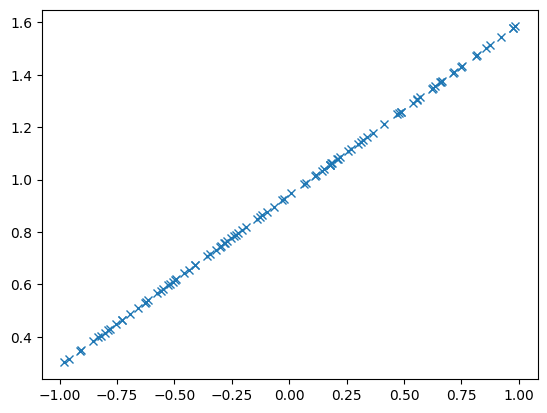

In [6]:
generator.sigma = 0.0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

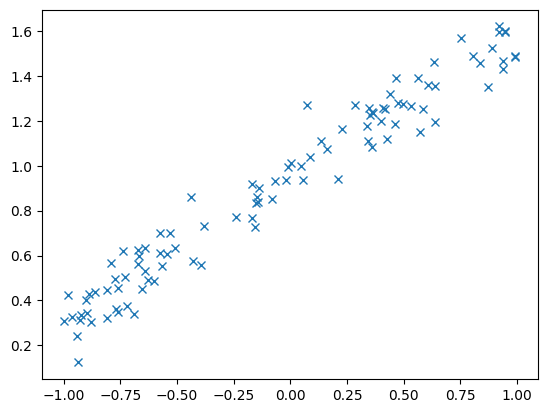

In [7]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

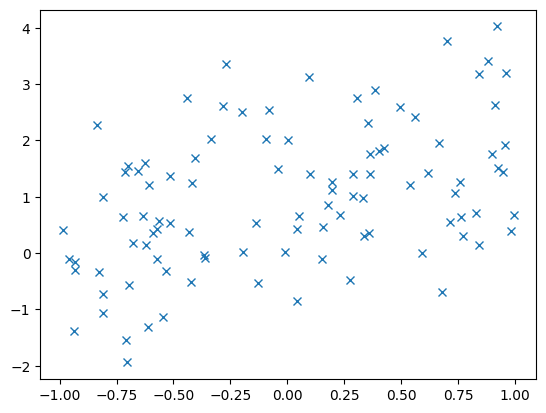

In [8]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

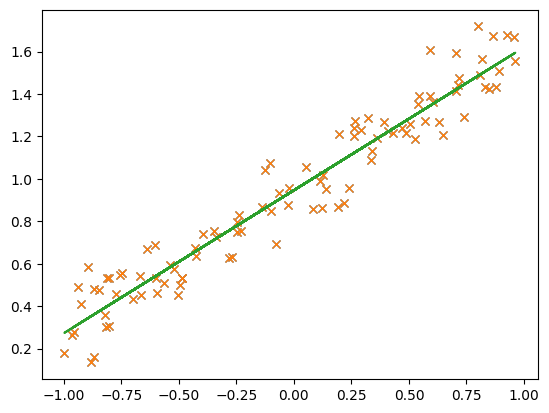

In [9]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
V = Z.copy()
for t in range(Xa.shape[0]):
    X[t]
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("linear_fit.pdf")

In [10]:
# This class generates data from a simple non-linear model
class KernelModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int, n_centers: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.C = np.random.normal(size = [n_centers, n_x])
        self.Z = np.random.normal(size = [n_centers, n_y])
        self.n_centers = n_centers
        self.sigma = 1
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = X[t, :]
            D = np.array([np.linalg.norm(x - self.C[c]) for c in range(self.n_centers)])
            Y[t, :] =  np.dot(np.exp(-D), self.Z) + self.sigma * np.random.normal(size=self.n_y) 
        return X, Y

In [11]:

generator = KernelModelGenerator(1, 1, 10)

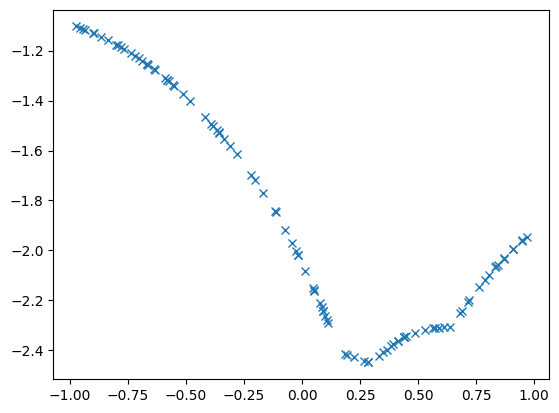

In [12]:
generator.sigma = 0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

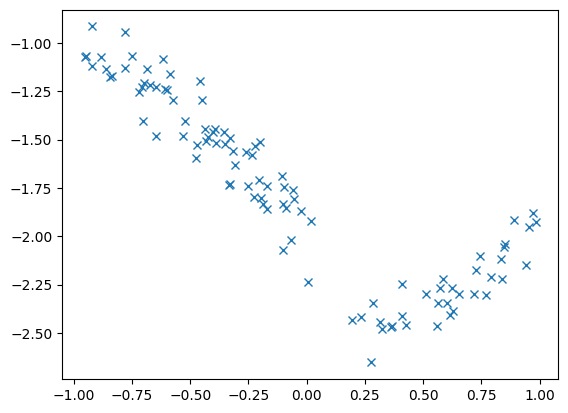

In [13]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

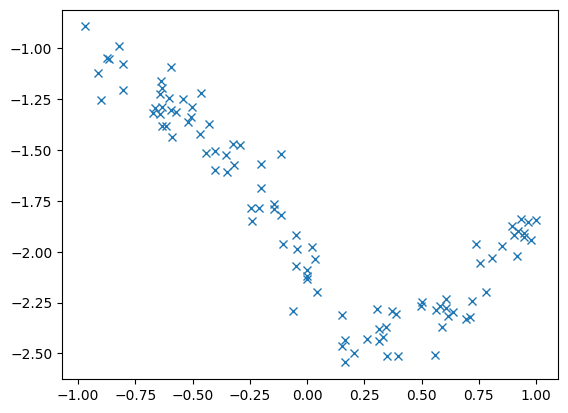

In [46]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

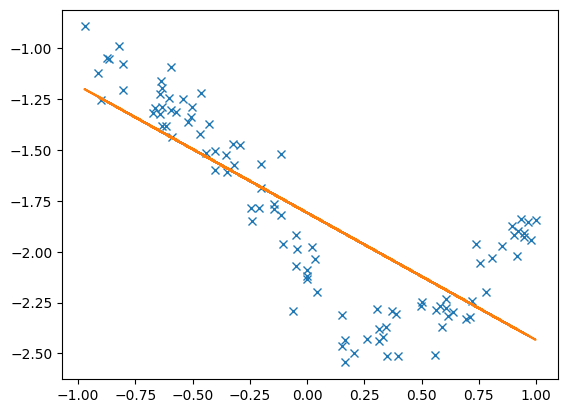

In [47]:
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
for t in range(X.shape[0]):
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit.pdf")

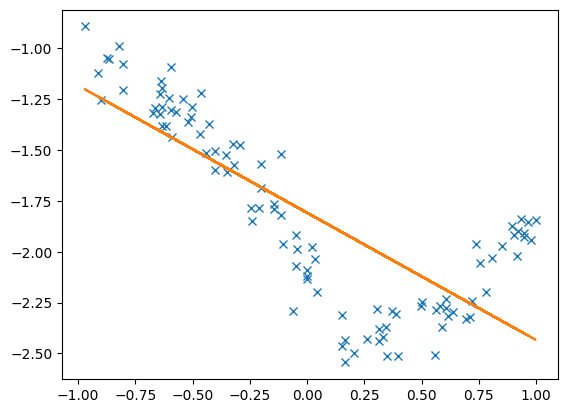

In [50]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
model = LinearRegression().fit(X, Y) # use X as is
Z = model.predict(X)
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit_sklearn.pdf")

In [40]:
X

array([-0.40278824, -0.50455955, -0.52400293,  0.71559774,  0.12225489,
       -0.24039458,  0.15545846, -0.26573023,  0.2850483 , -0.07283247,
       -0.26484041,  0.72047177,  0.22133772,  0.51810126,  0.29246053,
       -0.2603237 , -0.76942662, -0.92116441, -0.48677478, -0.340108  ,
        0.91080039, -0.98634089,  0.33382014,  0.46341129,  0.24878473,
       -0.16256061,  0.8899366 ,  0.03462474,  0.14581259, -0.36771896,
       -0.24416137, -0.6010113 ,  0.77561973, -0.13681564,  0.71521546,
        0.32881587, -0.4084525 , -0.1579582 , -0.26279285,  0.59939421,
       -0.51373031, -0.78842231, -0.56683978,  0.32353572, -0.42677248,
        0.34789754, -0.85606894, -0.47833675,  0.53308155,  0.21951675,
       -0.01662134,  0.62319792, -0.46953689,  0.85229635, -0.17800213,
        0.26000737, -0.71094982, -0.5782677 ,  0.03319038,  0.1038441 ,
       -0.1951042 ,  0.92486468,  0.80196758,  0.15935941, -0.28568758,
        0.93092814,  0.0552896 ,  0.37374133, -0.98974801,  0.09